# Verbesserte Schätzung der Inputparameter: Geschrumpfte Schätzer 

## Einleitung

Eine naheliegende Herangehensweise zur Adressierung der Schätzfehlerproblematik befasst sich mit dem in der ursprünglichen Studie von Markowitz unberücksichtigten Schritt der Bestimmung von verbesserten Schätzern für die Inputparameter $\mu$ und $\Sigma$. Dabei besteht die grundlegende Problematik darin, dass es sich bei den Annahmen über die zukünftigen Werte dieser Parameter stets um Schätzungen handelt und diese folglich mit Unsicherheit behaftet sind. Das Ziel bei der Entwicklung optimierter Schätzverfahren ist es folglich, die Auswirkungen der Schätzfehlerproblematiken durch eine verbesserte Schätzung der Parameter zu reduzieren.

Auf den ersten Blick erscheint es überraschend, dass es möglich ist, einen besseren Schätzer für $\mu$ als das arithmetische Mittel zu finden, da letzteres doch bei normalverteilten Renditen den besten unverzerrten Schätzer darstellt. Trotzdem bietet sich Verbesserungspotential, indem man - anders als beim arithmetischen Mittel - für die Schätzung der erwarteten Rendite von Aktie i nicht nur Zeitreiheninformationen bezüglich der Aktie i verwendet, sondern auch Informationen aus sonstigen Aktien. Ökonomisch ist dieses Verbesserungspotential nicht überraschend: Das arithmetische Mittel schätzt beispielsweise die erwartete Rendite von BASF lediglich aus den vergangenen Renditen von BASF, während z.B. die sogenannten **geschrumpften Schätzer** zusätzlich noch Informationen aus der Zeitreihe der Bayer-Aktie verwenden. Im Ergebnis erhält man hierdurch einen Vektor für erwartete Renditen, der sich als gewogenes Mittel der arithmetischen Mittelwerte und einem exogenen Schätzwert (sog. Prior) berechnet. Im Kern werden so die ursprünglich mit Unsicherheit behafteten einfachen historisch basierten Schätzwerte an einen vordefinierten Prior angepasst.

Die folgenden Abschnitte stellen die drei bekanntesten geschrumpften Schätzer im Rahmen der Portfoliooptimerung vor: den James-Stein Schätzer und den Bayes-Stein Schätzer für den Vektor der zukünftigen erwarteten Renditen $\mu$, und den Ledoit-Wolf Schätzer für die zukünftige Varianz-Kovarianzmatrix $\Sigma$.  


## James-Stein Schätzer für $\mu$

Bei der Schätzung des Erwartungswerts nach der Methode von James und Stein (1961) wird dabei als Prior der durchschnittliche Renditemittelwert aller Wertpapiere in der Stichprobe herangezogen (dieser wird im Englischen auch als "Grand-Mean" bezeichnet). Die einzelnen Mittelwerte werden im Ausmass des eruierten Schrumpfungsfaktors $\hat{w}$ in die Richtung dieses Grand-Mean angepasst, respektive geschrumpft. Je weiter die individuellen Stichprobenmittelwerte vom durchschnittlichen Mittelwert entfernt sind, desto grösser ist das Ausmass der Schrumpfung. Durch diesen Prozess kann der Einfluss von Extremwerten in der Stichprobe reduziert werden, wodurch die Robustheit des Schätzers optimiert und folglich auch die Sensitivität des Portfolios reduziert werden kann. Die Darstellung der mathematischen Konzeption des Schätzers erfolgt im Wesentlichen anhand von Jorion (1986, S. 283 ff.). 

Die Formel für den James-Stein Schätzer definiert sich wie folgt: 

$$ (1) \quad \hat{\mu}_{JS}=(1-\hat{w})Y+\hat{w}Y_0\iota .$$

Dabei stellt $\iota$ den Einheitsvektor der Dimension $Nx1$ dar und $Y^T=(\bar{r}_1, ..., \bar{r}_N)$ den Zeilenvektor der $N$ historischen Renditemittelwerte. $\bar{r}_i$ bezeichnet den Mittelwert (im Zeitpunkt $t$) der Renditen von Wertpapier $i$ auf Basis einer Zeitreihe mit $k$ Beobachtungen:

$$ (2) \quad \bar{r}_i=\frac{1}{k}\sum_{j=t-k}^{t}r_{i,j}  .$$

Der als Prior festgelegte Wert in der Form des Grand-Mean ergibt sich aus: 

$$ (3) \quad Y_0=\frac{1}{N}\sum_{i}^{N}\bar{r}_{i} . $$

Der Schrumpfungsfaktor $\hat{w}$ lässt sich wie folgt berechnen:

$$ (4) \quad \hat{w}=\min(1, \frac{N-2}{k(Y-Y_0\iota)^T\Sigma^{-1}(Y-Y_0\iota)}). $$

Der Schrumpfungsfaktor umfasst einen Bereich von null bis eins. Es gilt: Je mehr sich der Wert des Gewichts $\hat{w}$ an den Wert 1 annähert, umso mehr werden die Stichprobenmittelwerte in Richtung der durchschnittlichen Rendite aller Wertpapiere geschrumpft. Gleichung (4) macht deutlich, dass der Schrumpfungsfaktor von der gesamten Anzahl ($k$) an Beobachtungen im Schätzzeitraum, der Anzahl ($N$) der Wertpapiere, der Varianz-Kovarianzmatrix $\Sigma$ sowie dem Abstand zwischen den individuellen durchschnittlichen historischen Renditen der Wertpapiere und der durchschnittlichen Rendite aller Wertpapiere abhängt. 

Der Gewichtungsfaktor $\hat{w}$ bestimmt, wie stark Zeitreiheninformationen und eine exogene Information die Schätzung für die erwarteten Renditen beeinflussen. Bei einem langen Beobachtungszeitraum ($k$ groß) werden die Informationen aus der Zeitreihe hoch gewichtet, d.h. $\hat{w}$ ist klein. Dagegen steigt der Einfluss des Vorwissens, falls die wahren erwarteten Renditen eng um den (einheitlichen) Schätzwert $Y_0$ liegen. Aus (1) wird klar, dass die Verbesserung der Schätzung aus der Berücksichtigung des Priors resultiert. Der Ansatz von James und Stein verhindert somit extreme Schätzwerte für erwartete Renditen durch eine implizite Glättung mittels des Prior. 



## Bayes-Stein Schätzer für $\mu$

Als eine weitere Methode im Bereich der geschrumpften Schätzer entwickelte Jorion (1986) den Bayes-Stein Schätzer, welcher ebenfalls die Schrumpfung der einzelnen Stichprobenmittelwerte in Richtung eines globalen Mittelwerts anstrebt. Im Unterschied zum James-Stein Schätzer wird hier allerdings die erwartete Rendite des *Minimum Varianz Portfolios (MVP)* als globaler Mittelwert angenommen, wohingegen der Prozess der Schrumpfung mit demjenigen des James-Stein Schätzers kongruent ist. Begründet werden kann die Wahl des MVP damit, dass bei der Bestimmung der Gewichte des MVP keine Annahmen bezüglich der erwarteten Renditen in die Berechnung einfliessen und diese somit nur von den Werten der Varianz-Kovarianzmatrix abhängig sind. Falls nur die Budgetrestriktion als Nebenbedingung bei der Optimierung Berücksichtigung findet, läßt sich der Gewichtsvektor des MVP analytisch bestimmen (vgl. z.B. Franzen und Schäfer, 2018, S. 188 f.):

$$ (5) \quad w_{MVP}=\frac{\iota^T\Sigma^{-1}}{\iota^T\Sigma^{-1}\iota}. $$ 

Unter der Annahme, dass Schätzfehler in Bezug auf die Risikoterme (Varianzen und Kovarianzen) vernachlässigt werden können, wird das MVP somit weniger stark von Schätzfehlern beeinflusst. Für die erwartete Rendite des MVP als Prior folgt somit (mit $Y$ als $Nx1$ Spaltenvektor der empirischen Renditemittelwerte): 

$$ (6) \quad \hat{\mu}_{MVP}=w_{MVP}Y=\frac{\iota^T\Sigma^{-1}Y}{\iota^T\Sigma^{-1}\iota}. $$ 

Der Bayes-Stein Schätzer ergibt sich aus: 

$$ (7) \quad \hat{\mu}_{BS}=(1-\hat{w})Y+\hat{w}\hat{\mu}_{MVP}\iota . $$

Der Schrumpfungsfaktor, mit welchem die einzelnen empirischen Renditen in Richtung der Rendite des MVP angepasst werden, ist definiert durch: 

$$ (8) \quad \hat{w}=\frac{N+2}{(N+2)+k(Y-\hat{\mu}_{MVP}\iota)^T\Sigma^{-1}(Y-\hat{\mu}_{MVP}\iota)}, $$

mit $N$ als Zahl der im Portfolio enthaltenen Wertpapiere sowie $k$ als Anzahl Perioden in der Stichprobe. Zusätzlich zur Anpassung der erwarteten Renditen wird aufgrund des Umstands, dass das wahre $\Sigma$ unbekannt ist, eine Anpassung der Schätzung der Varianz-Kovarianzmatrix nach Zellner und Chetty (1965) vorgeschlagen, mit $\hat{\Sigma}$ als die empirisch geschätzte Varianz-Kovarianzmatrix (Jorion, 1986, S. 286):


$$ (9) \quad \hat{\Sigma}_{ZC}=\frac{k-1}{k-N-2}\hat{\Sigma} . $$


Mit der Absicht, die Auswirkungen der Schätzfehlerproblematik im Rahmen der Portfolioauswahl zu untersuchen, stellte Jorion (1985) in einer früheren Studie bereits fest, dass die geschrumpften Schätzer die konventionellen empirischen Mittelwerte in Bezug auf die out-of-sample Performance dominieren. In der Folge konnte Jorion (1986) zusätzlich die Überlegenheit des Bayes-Stein Schätzers, verglichen mit dem klassischen Ansatz, belegen.  

## Ledoit-Wolf Schätzer für $\Sigma$

Ledoit und Wolf (2003) greifen die Problematik der Schätzung von Varianz-Kovarianzmatrizen aus einer Stichprobe auf und schlagen eine Schrumpfung der empirischen Varianz-Kovarianzmatrix in Richtung einer Matrix mit einer festen Struktur vor. Da die Anzahl der zu schätzenden Kovarianzen quadratisch mit der Anzahl $N$ der Wertpapiere steigt (es gilt: Anzahl Kovarianzen $=0,5\cdot N(N-1)$), gewinnt die Schätzfehlerproblematik bei der Bestimmung der Varianz-Kovarianzmatrix für große Portfolios an Bedeutung. 

Das grundlegende Prinzip bei der Schrumpfung der Varianz-Kovarianzmatrix umfasst die Kombination der folgenden Elemente:

- empirische Varianz-Kovarianzmatrix $\hat{\Sigma}$ aus der Stichprobe ohne feste Struktur
- Schrumpfungsfaktor $\hat{w}$
- Varianz-Kovarianzmatrix mit einer festen Struktur $\hat{\Sigma}_{cc}$

Durch eine konvex-lineare Kombination (über den Schrumpfungsfaktor) der beiden Matrizen entsteht ein Kompromiss zwischen der Varianz-Kovarianzmatrix aus der Stichprobe $\hat{\Sigma}$ und einer vorgegebenen festen Struktur $\hat{\Sigma}_{cc}$, dem Schrumpfungsziel. Dabei sollte das Schrumpfungsziel zwei wesentliche Kriterien gleichermaßen erfüllen: Einerseits sollte es nur eine geringe Anzahl an freien Parametern besitzen, so dass eine feste Struktur des Schätzers entsteht, und andererseits sollte es wichtige Merkmale der unbekannten zu schätzenden Parameter berücksichtigen. Ledoit und Wolf (2003) schlagen bei der Festlegung der Varianz-Kovarianzmatrix $\hat{\Sigma}_{cc}$ entweder die Ermittlung von Renditekorrelationen auf Basis des **Einfaktormodells** von Sharpe (1963) oder die Annahme **konstanter paarweiser Korrelationen** vor. Da der letztgenannte Vorschlag bei in der Regel vergleichbaren Ergebnissen einfacher zu implementieren ist, soll er auch im Folgenden zur Bestimmung von $\hat{\Sigma}_{cc}$ verwendet werden.

Die zuvor angesprochene konvex-lineare Kombination der beiden Matrizen ergibt sich wie folgt:

$$ (10) \quad \hat{\Sigma}_{LW}=\hat{w}\hat{\Sigma}_{cc}+(1-\hat{w})\hat{\Sigma},$$

wobei $\hat{\Sigma}$ die Varianz-Kovarianzmatrix der Stichprobe darstellt und $\hat{\Sigma}_{cc}$ die Varianz-Kovarianzmatrix der Stichprobe unter der Annahme einer konstanten Korrelation (*constant correlation* - cc). 

Die Berechnung der zuletzt genannten Varianz-Kovarianzmatrix erfolgt stufenweise. Da sich die Kovarianz $Cov(X,Y)$ zweier Zufallsvariablen $X$ und $Y$ als Produkt der Volatilitäten ($\sigma_X, \sigma_Y$) und dem Korrelationskoeffizienten $Corr(X,Y)$ schreiben lässt (d.h., $Cov(X,Y)=\sigma_X \cdot \sigma_Y \cdot Corr(X,Y)$), gilt für die empirische Varianz-Kovarianzmatrix:

$$ (11) \quad \hat{\Sigma}=\Lambda C \Lambda^T, $$

wobei $\Lambda$ eine Diagonalmatrix der Renditevolatilitäten und $C$ die Korrelationsmatrix der Stichprobe verkörpert. Mit $\hat{\rho}_{ij}$ als empirischen Korrelationskoeffizienten zwischen den Renditen von Wertpapier $i$ und $j$, lässt sich $C$ darstellen als:

$$ (12)\quad C=\left( \begin{array}{rrrr}
1 & \hat{\rho}_{12} & \dots & \hat{\rho}_{1N} \\
\hat{\rho}_{21} & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \hat{\rho}_{N-1N} \\
\hat{\rho}_{N1} & \dots & \hat{\rho}_{NN-1} & 1 \\
\end{array}\right) .$$

Zur Berechnung von $\hat{\Sigma}_{cc}$ wird einfach die Korrelationsmatrix aus der Stichprobe durch eine mit konstanten Korrelationen ersetzt

$$ (13)\quad C_{cc}=\left( \begin{array}{rrrr}
1 & \hat{\rho} & \dots & \hat{\rho} \\
\hat{\rho} & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \hat{\rho} \\
\hat{\rho} & \dots & \hat{\rho} & 1 \\
\end{array}\right) ,$$

wobei $\hat{\rho}$ den Durchschnitt aller ($0,5 \cdot N(N-1)$) Korrelationen aus der Stichprobe umfasst. Es gilt:

$$ (14) \quad \hat{\rho}=\frac{2}{(N-1)N}\sum_{i=1}^N \sum_{j=i+1}^N \hat{\rho}_{ij} . $$

Für das Schrumpfungsziel folgt damit: $\hat{\Sigma}_{cc}=\Lambda C_{cc} \Lambda^T$

Die Wahl eines optimalen Schrumpfungsfaktors fällt nach Ledoit und Wolf (2003) auf diejenige Konstante, die den erwarteten Abstand zwischen dem geschrumpften Schätzer und der wahren Varianz-Kovarianzmatrix minimiert. Es kann gezeigt werden, dass sich die optimale Intensität der Schrumpfung proportional zu einer Konstanten $\hat{g}$ dividiert durch den Stichprobenumfang $k$ verhält. Der optimale Schrumpfungsfaktor ergibt sich demnach wie folgt:

$$ (15) \quad \hat{w}= max \left \{0, min \left \{\frac{\hat{g}}{k},1\right \} \right \}. $$


Die Berechnung der drei geschrumpften Schätzer und ihre Auswirkungen auf die Zusammensetzung optimaler Portfolios werden im Rahmen der folgenden Fallstudie veranschaulicht. 

## Beginn der Fallstudie

Wir starten mit dem Import der benötigten Pakete. 

In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy.linalg as la

### Laden und Beschreiben der Datenbasis

Der verwendete Datensatz enthält Kurshistorien (Monatsanfangskurse) der folgenden zehn Unternehmen: Abbott Laboratories (ABT), Boeing Industries (BA), Costco Wholesale (COST), Cisco Systems (CSCO), IBM (IBM), Intel (INTC), Merk (MRK), Microsoft (MSFT), AT&T (T), und Exxon Mobil Corporation (XOM). Die Kurshistorien beziehen sich auf den Zeitraum *12.2004-12.2009* (61 Monate).

In [ ]:
# hier den Dateipfad einfügen!
# cd "..."

In [3]:
frame = pd.read_excel('Kapitel A1.xlsx', 'Tabelle1', index_col=0, parse_dates=True)

In [4]:
frame.tail(6)

,ABT,BA,COST,CSCO,IBM,INTC,MRK,MSFT,T,XOM
2009-07-01,44.99,42.91,49.50,22.01,117.93,19.25,30.01,23.52,26.23,70.39
2009-08-03,45.23,49.67,50.98,21.60,118.05,20.32,32.43,24.65,26.05,69.15
2009-09-01,49.47,54.15,56.38,23.54,119.61,19.57,31.63,25.72,27.01,68.61
2009-10-01,50.57,47.80,56.85,22.81,120.61,19.11,30.93,27.73,25.67,71.67
2009-11-02,54.49,52.41,59.91,23.40,126.35,19.20,36.21,29.41,26.94,75.07
2009-12-01,54.48,53.72,60.73,23.92,127.94,19.66,36.88,30.01,27.18,76.04


Auf Basis von stetigen (log) Renditen werden die historischen Mittelwerte und die Varianz-Kovarianzmatrix der Renditen berechnet und jeweils annualisiert. 

In [5]:
# using log returns
log_returns = np.log1p(frame.pct_change().dropna()) 
means = log_returns.mean().values*12 # annualised
Sigma = log_returns.cov().values*12 # annualised

### James-Stein Schätzer

Die Berechnung des Grand-Mean $Y_0$, des Schrumpfungsfaktors $\hat{w}$, und der James-Stein geschätzten erwarteten Renditen $\hat{\mu}_{JS}$ erfolgt nun anhand der oben präsentierten Formeln (1), (3) und (4).

In [6]:
# overall average return = return prior for James-Stein
grand_mean=np.mean(means)

# James-Stein shrinkage factor
phi_js = np.min([1,(len(means)-2)/(len(log_returns)*(np.matrix(means-grand_mean)*\
        la.inv(Sigma)*np.matrix(means-grand_mean).T)[0,0])])

# James-Stein expected returns
js_means = (1-phi_js)*means + phi_js*grand_mean


In [7]:
phi_js

0.4475110828261736

Aus der vorliegenden Datengrundlage ergab sich entsprechend Formel (4) ein Schrumpfungsfaktor in Höhe von $\hat{w}=0,44$. Auf Basis des ermittelten Schrumpfungsfaktors konnten anschließend die erwarteten Renditen der einzelnen Wertpapiere mit Hilfe des James-Stein Schätzers bestimmt werden. Ein Vergleich mit den herkömmlich geschätzten erwarteten Renditen ergibt:  

In [8]:
pd.DataFrame({'JS-Means (%)': np.round(js_means, 4)*100,\
              'Hist. Means (%)': np.round(means,4)*100,\
             'Abs. Difference (%)': np.round(js_means-means, 4)*100},\
             index=frame.columns)

,JS-Means (%),Hist. Means (%),Abs. Difference (%)
ABT,2.99,3.10,-0.12
BA,1.68,0.74,0.94
COST,3.78,4.53,-0.76
CSCO,3.63,4.27,-0.64
IBM,4.15,5.21,-1.06
INTC,-0.65,-3.47,2.83
MRK,2.79,2.75,0.04
MSFT,2.55,2.32,0.23
T,1.86,1.07,0.79
XOM,5.63,7.89,-2.26


Oder in Form eines Balkendiagramms visualisiert:

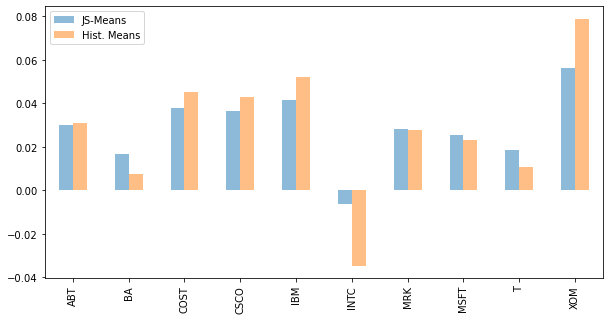

In [9]:
pd.DataFrame({'JS-Means': js_means, 'Hist. Means': means},index=frame.columns). \
plot.bar(stacked=False, alpha=0.5, figsize=(10,5));

Es zeigt sich, dass zwischen der herkömmlichen Schätzung der erwarteten Renditen und der Prognosen mit Hilfe des James-Stein Schätzers nur geringfügige Unterschiede bestehen. Zieht man jedoch in Betracht, dass die klassische Portfoliooptimierung bereits auf geringe Abweichungen in den erwarteten Renditen sehr sensitiv reagiert, sollte der Einfluss des James-Stein Schätzers im Kontext der Portfoliooptimierung nicht unterschätzt werden.  

### Bayes-Stein Schätzer

Zunächst wird der adjustierte Schätzer $\hat{\Sigma}$ der Varianz-Kovarianzmatrix nach Zellner und Chetty (1965) berechnet. Der Adjustierungsfaktor lautet: $\frac{k-1}{k-N-2}$ (siehe Formel (9) oben).

In [11]:
adj_Sigma = ((len(log_returns)-1)/(len(log_returns)-len(means)-2))*Sigma

Mit der Budgetrestriktion als einzige Nebenbedingung ergeben sich die Gewichte des MVP  gemäß:
$$ (5) \quad w_{MVP}=\frac{\iota^T\Sigma^{-1}}{\iota^T\Sigma^{-1}\iota}. $$ 


In [12]:
iota = np.ones(Sigma.shape[0]) # identity vector of dimension 10
inv_adj_Sigma = la.inv(adj_Sigma)
Weight_GMV = inv_adj_Sigma @ iota / (iota @ inv_adj_Sigma @ iota)
pd.DataFrame([round(x,4) for x in Weight_GMV],index=frame.columns).T

,ABT,BA,COST,CSCO,IBM,INTC,MRK,MSFT,T,XOM
0,0.4359,-0.0418,0.2083,-0.0125,0.141,0.0902,-0.1451,-0.0239,0.0445,0.3035


Für die erwartete Rendite des MVP gilt nach Gleichung (6): $\hat{\mu}_{MVP}=w_{MVP}Y$. 

In [13]:
# expected return of MVP (= return prior for James-Stein)
eret_GMV = (np.matrix(Weight_GMV)* np.matrix(means).T)[0,0]
eret_GMV

0.0462098479530484

Berechnung des BS-Schrumpfungsfaktors gemäß Gleichung (8):

$$ (8) \quad \hat{w}=\frac{N+2}{(N+2)+k(Y-\hat{\mu}_{MVP}\iota)^T\Sigma^{-1}(Y-\hat{\mu}_{MVP}\iota)}. $$

In [14]:
# calculation of Bayes-Stein shrinkage factor phi_bs:
phi_bs = (len(means)+2)/((len(means)+2) + len(log_returns)*(np.matrix(means-eret_GMV)\
        * inv_adj_Sigma * np.matrix(means-eret_GMV).T)[0,0])
phi_bs

0.4777796219708953

Es resultiert ein Schrumpfungsfaktor in Höhe von $\hat{w}=0,48$. Nun läßt sich der Bayes-Stein Schätzer der erwarteten Renditen berechnen:

$$ \quad \hat{\mu}_{BS}=(1-\hat{w})Y+\hat{w}\hat{\mu}_{MVP}\iota . $$


In [15]:
# Bayes-Stein expected returns
bs_means = (1-phi_bs)*means + phi_bs*eret_GMV

Ein Vergleich der drei Schätzer (JS, BS, Historisch) für $\mu$ in Tabellenform:

In [16]:
pd.DataFrame({'JS-Means': np.round(js_means,4),\
              'BS-Means': np.round(bs_means,4),\
              'Hist. Means': np.round(means,4)},\
             index=frame.columns)

,JS-Means,BS-Means,Hist. Means
ABT,0.0299,0.0383,0.0310
BA,0.0168,0.0259,0.0074
COST,0.0378,0.0458,0.0453
CSCO,0.0363,0.0444,0.0427
IBM,0.0415,0.0493,0.0521
INTC,-0.0065,0.0039,-0.0347
MRK,0.0279,0.0364,0.0275
MSFT,0.0255,0.0342,0.0232
T,0.0186,0.0276,0.0107
XOM,0.0563,0.0633,0.0789


oder als Balkendiagramm:

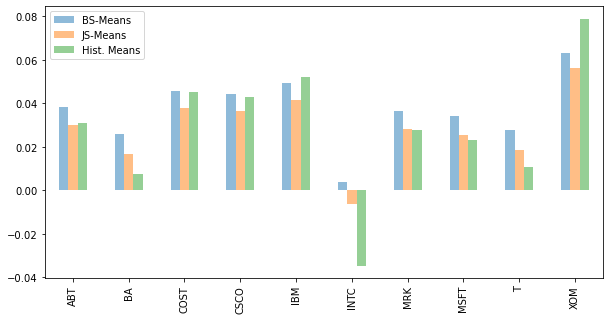

In [17]:
pd.DataFrame({'BS-Means': bs_means, 'JS-Means': js_means, 'Hist. Means': means},index=frame.columns). \
plot.bar(stacked=False, alpha=0.5, figsize=(10,5));

### Ledoit-Wolf Schätzer der Varianz-Kovarianzmatrix

Über `log_returns.corr().values` wird die empirische Korrelationsmatrix $C$ auf Basis stetiger Renditen berechnet und in das Array `corr` überführt. Die durchschnittliche Korrelation $\hat{\rho}$ wird mit `mean(corr[corr!=1])` ermittelt, wobei die Diagonalelemente $\hat{\rho}_{ii}$ von $C$ durch die Bedingung `corr!=1` ausgeschlossen werden. 

In [18]:
corr = log_returns.corr().values
Sigma = log_returns.cov().values*12

# average of pairwise correlation (without diagonal elements)
avg_corr = np.mean(corr[corr!=1])

**Konstruktion der Korrelationsmatrix $C_{cc}$ mit konstanter Korrelation**

`np.eye(len(corr))` erzeugt eine Diagonalmatrix der Dimension $NxN$ mit nullen off-diagonal und einsen auf der Hauptdiagonalen und `np.ones((len(corr), len(corr)))` eine "Einser"-Matrix der Dimension $NxN$. Werden beide Matrizen mit `(1-avg_corr)` bzw. `avg_corr` multipliziert und dann addiert, resultiert $C_{cc}$. 

In [19]:
# generating a corr matrix with constant correlations as off diagonal
constant_corr = \
(1-avg_corr)*np.eye(len(corr)) + avg_corr*np.ones((len(corr), len(corr)))

**Konstruktion der Varianz-Kovarianzmatrix $\hat{\Sigma}_{cc}$ unter Annahme konstanter Korrelation**

Es gilt: $\hat{\Sigma}_{cc}=\Lambda C_{cc} \Lambda^T$. 

Über `np.sqrt(np.diagonal(Sigma))` werden die Diagonalelemente (Varianzen) der empirischen Varianz-Kovarianzmatrix $\hat{\Sigma}$ extrahiert und in ein Array von Volatilitäten überführt. Dieses Array wird dann mit `np.diag()` in die Diagonalmatrix $\Lambda$ transformiert. 

In [22]:
# calculation of covariance matrix using a constant correlation assumption 
# the first part is diagonal matrix containing the volatilities p.a.
const_Sigma =\
(np.diag(np.sqrt(np.diagonal(Sigma))).dot(constant_corr)).dot(  \
 np.diag(np.sqrt(np.diagonal(Sigma))))

Unter Annahme eines Schrumpfungsfaktors in Höhe von $\hat{w}=0,45$, lässt sich nun gemäß Gleichung (10) der Ledoit-Wolf Schätzer der Varianz-Kovarianzmatrix ermitteln:

$$ (10) \quad \hat{\Sigma}_{LW}=\hat{w}\hat{\Sigma}_{cc}+(1-\hat{w})\hat{\Sigma}.$$

In [23]:
# assuming a given shrinkage constant phi_lw
phi_lw = 0.45

# calculating the Ledoit-Wolf covariance matrix
lw_Sigma = phi_lw * const_Sigma + (1-phi_lw)*Sigma

In [24]:
lw_Sigma.shape

(10, 10)

### Vergleich der Effizienzkurven und Portfolioallokationen

#### Allgemeines
Nachdem die erwarteten Renditen (und die Varianz-Kovarianzmatrix) ermittelt wurden, können diese als Inputparameter in die Portfoliooptimierung einfließen. Im Folgenden betrachten wir den Fall mit Leerverkaufsverbot (implementiert über positive Bestandsgrenzen). 

Zunächst definieren wir die Zielfunktionen der Optimierung ($\sigma_P^2 \rightarrow \min_{w}!$ bzw. für das MEP: $\mu_P \rightarrow \max_{w}!$) und bestimmen die Gewichte des Minimum Varianz Portfolios (MVP) und des Maximum Ertrag Portfolios (MEP). Die Struktur des MVP ist unabhängig von der Schätzung des Vektors der erwarteten Renditen. Wird dann die Portfoliooptimierung für verschiedene Zielrenditen zwischen der erwarteten Rendite des MVP und der des MEP durchgeführt, ergibt sich die entsprechende Effizienzkurve. 



In [25]:
# definition of target function for MVP to be minimized
def calculate_portfolio_var(w,Sigma):
    # function that calculates portfolio risk
    w = np.matrix(w) # w is a row (not column!) vector
    return (w*Sigma*w.T)[0,0]

# definition of target function for MEP to be maximized
def calculate_negative_portfolio_ret(w,means):
    # function that calculates -1 times the portfolio expected return
    w = np.matrix(w) # w is a row (not column!) vector
    means = np.matrix(means)
    return -(w*means.T)[0,0]

def calculate_portfolio_ret(w,means):
    # function that calculates portfolio expected return
    w = np.matrix(w) # w is a row (not column!) vector
    means = np.matrix(means)
    return (w*means.T)[0,0]

Gewichte des MVP und des MEP (unter Verwendung der historischen Varianz-Kovarianzmatrix `Sigma`, und Leerverkaufsverbot; naives Portfolio als Startgewichte).

In [26]:
# use equal weights "Weight_1N" as starting values 
Weight_1N = np.tile(1.0/means.shape[0], means.shape[0])

# positive weight portfolio
bnd=[(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),
     (0, 1),(0, 1),(0, 1),(0, 1),(0, 1)] # only positive weights
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x)-1.0})

# MVP
res2= minimize(calculate_portfolio_var, Weight_1N, args=Sigma, 
               bounds = bnd, method='SLSQP',constraints=cons,tol=1e-10, 
               options={'disp': True})
Weight_MV2 = res2.x

# MEP
res4= minimize(calculate_negative_portfolio_ret, Weight_1N, args=means, 
               bounds = bnd, method='SLSQP',constraints=cons,tol=1e-10, 
               options={'disp': True})
Weight_MRP = res4.x

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.012112846573987465
            Iterations: 21
            Function evaluations: 231
            Gradient evaluations: 21
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.07886975933686077
            Iterations: 11
            Function evaluations: 121
            Gradient evaluations: 11


#### James-Stein versus historische Mittelwerte

Zunächst erfolgt die Bestimmung des Intervals der Zielrenditen, separat auf Basis der JS und der historisch geschätzten erwarteten Renditen. 

In [27]:
# calculation of min and max target return
# min: expected return of MVP, max: expected return of MEP

# for historic means
min = calculate_portfolio_ret(Weight_MV2, means)
max = calculate_portfolio_ret(Weight_MRP, means)

# for JS means
min_js = calculate_portfolio_ret(Weight_MV2, js_means)
max_js = calculate_portfolio_ret(Weight_MRP, js_means)

Berechnung der Effizienzkurven. Zunächst für die historischen Mittelwerte:

In [28]:
# efficient frontier with hist. mean returns
V_Target = np.linspace(min, max, num=45)
V_Risk = np.zeros(V_Target.shape)
V_Return = np.zeros(V_Target.shape)
V_Weight = np.zeros((V_Target.shape[0], means.shape[0]))
for idx, Target_Return in enumerate(V_Target):
    cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x)-1.0},
            {'type': 'eq', 'fun': lambda x:  calculate_portfolio_ret(x,means)-Target_Return})
    res= minimize(calculate_portfolio_var, Weight_1N, args=Sigma, 
               bounds = bnd, method='SLSQP',constraints=cons,tol=1e-10)
    V_Weight[idx, :] = res.x.T
    V_Return[idx] = calculate_portfolio_ret(res.x,means)
    V_Risk[idx] = np.sqrt(calculate_portfolio_var(res.x, Sigma))

Und nun für die JS erwarteten Renditen:

In [29]:
# efficient frontier with JS mean returns
V_Target_js = np.linspace(min_js, max_js, num=45)
V_Risk_js = np.zeros(V_Target.shape)
V_Return_js = np.zeros(V_Target.shape)
V_Weight_js = np.zeros((V_Target.shape[0], means.shape[0]))
for idx, Target_Return in enumerate(V_Target_js):
    cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x)-1.0},
            {'type': 'eq', 'fun': lambda x:  calculate_portfolio_ret(x,js_means)-Target_Return})
    res= minimize(calculate_portfolio_var, Weight_1N, args=Sigma, 
               bounds = bnd, method='SLSQP',constraints=cons,tol=1e-10)
    V_Weight_js[idx, :] = res.x.T
    V_Return_js[idx] = calculate_portfolio_ret(res.x,js_means)
    V_Risk_js[idx] = np.sqrt(calculate_portfolio_var(res.x, Sigma))

Graphische Darstellung der Effizienzkurven:

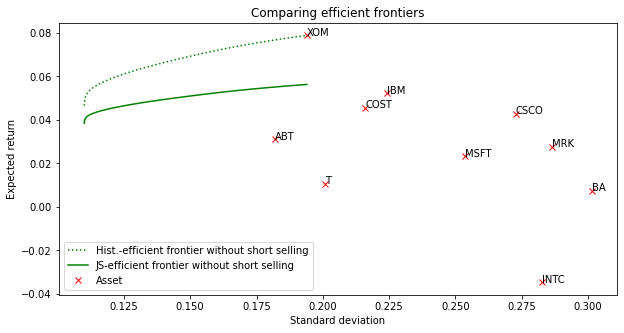

In [30]:
fig1 = plt.figure(num=1, facecolor='w', figsize=(10, 5))
ax = fig1.add_subplot(111)
plt.plot(V_Risk, V_Target, 'g:', label='Hist.-efficient frontier without short selling')
plt.plot(V_Risk_js, V_Target_js, 'g-', label='JS-efficient frontier without short selling')
plt.plot(np.sqrt(np.diagonal(Sigma)), means, 'rx', label='Asset')
for i, txt in enumerate(frame.columns):
   ax.annotate(txt, (np.sqrt(np.diagonal(Sigma))[i],means[i]))
plt.legend(loc=3,  frameon=True)
plt.xlabel('Standard deviation')
plt.ylabel('Expected return')
plt.title('Comparing efficient frontiers')
plt.show()

Es wird deutlich, dass die Effizienzkurve auf Basis der James-Stein erwarteten Renditen deutlich unter der herkömmlichen Effizienzkurve liegt, obwohl die absoluten Abweichungen der dargestellten Schätzverfahren nur geringfügig waren. 

Werden jedoch die einzelnen Portfoliogewichte entlang der gesamten Effizienzkurve gemeinsam in einem Flächendiagramm dargestellt, erscheint auf den ersten Blick auffällig, dass die Portfoliogewichte beim Vergleich offensichtlich nur minimal abweichen. Bei genauerer Betrachtung stellt man jedoch fest, dass sich die Portfoliogewichte auf der horizontalen Achse verschoben haben. Man erkennt auch, dass sich die Zuordnung der erwarteten Renditen entsprechend verändert hat. 

Portfoliogewichte auf Grundlage historisch geschätzter erwarteter Renditen:

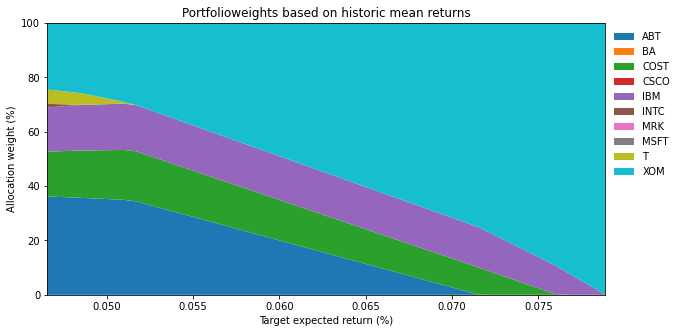

In [31]:
fig2 = plt.figure(num=2, facecolor='w', figsize=(10, 5))
plt.stackplot(V_Target, V_Weight.T*100)
plt.axis([min, max, 0.0, 100.0])
plt.legend(list(frame.columns),
           loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False)
plt.xlabel('Target expected return (%)')
plt.ylabel('Allocation weight (%)')
plt.title('Portfolioweights based on historic mean returns')
plt.show()

Portfoliogewichte auf Grundlage des JS Schätzers der erwarteten Renditen:

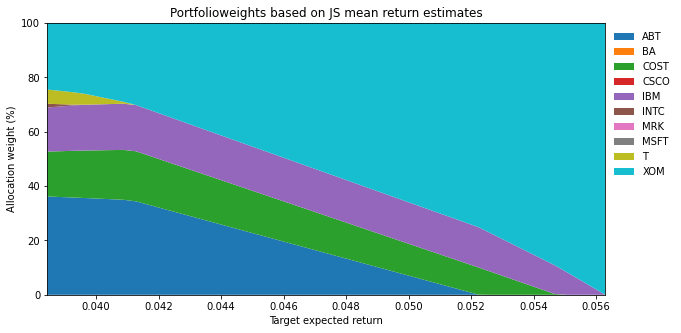

In [32]:
fig3 = plt.figure(num=2, facecolor='w', figsize=(10, 5))
plt.stackplot(V_Target_js, V_Weight_js.T*100)
plt.axis([min_js, max_js, 0.0, 100.0])
plt.legend(list(frame.columns),
           loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False)
plt.xlabel('Target expected return') 
plt.title('Portfolioweights based on JS mean return estimates')
plt.ylabel('Allocation weight (%)')
plt.show()

#### Bayes-Stein versus historische Mittelwerte

Bestimmung des Intervals der Zielrenditen für die Effizienzkurve auf Basis des BS Schätzers der erwarteten Renditen.

In [33]:
# calculation of min and max target return
# min: expected return of MVP, max: expected return of MEP

min_bs = calculate_portfolio_ret(Weight_MV2, bs_means)
max_bs = calculate_portfolio_ret(Weight_MRP, bs_means)

Berechnung der Effizienzkurve:

In [34]:
V_Target_bs = np.linspace(min_bs, max_bs, num=45)
V_Risk_bs = np.zeros(V_Target.shape)
V_Return_bs = np.zeros(V_Target.shape)
V_Weight_bs = np.zeros((V_Target.shape[0], means.shape[0]))
for idx, Target_Return in enumerate(V_Target_bs):
    cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x)-1.0},
            {'type': 'eq', 'fun': lambda x:  calculate_portfolio_ret(x,bs_means)-Target_Return})
    res= minimize(calculate_portfolio_var, Weight_1N, args=Sigma, 
               bounds = bnd, method='SLSQP',constraints=cons,tol=1e-10)
    V_Weight_bs[idx, :] = res.x.T
    V_Return_bs[idx] = calculate_portfolio_ret(res.x,bs_means)
    V_Risk_bs[idx] = np.sqrt(calculate_portfolio_var(res.x, Sigma))

Graphische Darstellung:

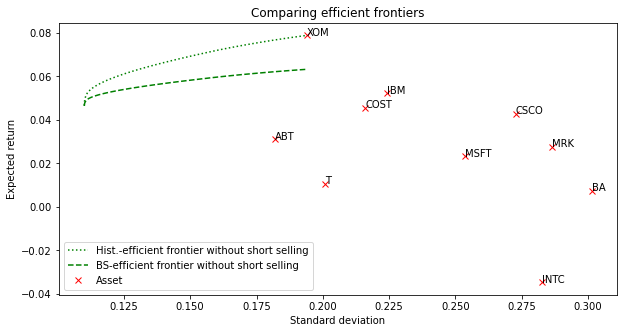

In [35]:
fig4 = plt.figure(num=1, facecolor='w', figsize=(10, 5))
ax = fig4.add_subplot(111)
plt.plot(V_Risk, V_Target, 'g:', label='Hist.-efficient frontier without short selling')
plt.plot(V_Risk_bs, V_Target_bs, 'g--', label='BS-efficient frontier without short selling')
plt.plot(np.sqrt(np.diagonal(Sigma)), means, 'rx', label='Asset')
for i, txt in enumerate(frame.columns):
   ax.annotate(txt, (np.sqrt(np.diagonal(Sigma))[i],means[i]))
plt.legend(loc=3,  frameon=True)
plt.xlabel('Standard deviation')
plt.ylabel('Expected return')
plt.title('Comparing efficient frontiers')
plt.show();

Es wird deutlich, dass die Effizienzkurve des Bayes-Stein Schätzers unter der herkömmlichen Effizienzkurve liegt. Werden jedoch die einzelnen Portfoliogewichte entlang der gesamten Effizienzkurve gemeinsam in einem Flächendiagramm dargestellt, erscheint es ähnlich den Ergebnissen des James-Stein Schätzers auf den ersten Blick eher auffällig, dass die Portfoliogewichte beim Vergleich offensichtlich nur geringfügig abweichen. Bei genauerer Betrachtung stellt man jedoch fest, dass sich die Portfoliogewichte tatsächlich auf der horizontalen Achse verschoben haben. In diesem Zusammenhang hat sich auch die Zuordnung der erwarteten Renditen verändert. 

Portfoliogewichte auf Grundlage des BS Schätzers der erwarteten Renditen:

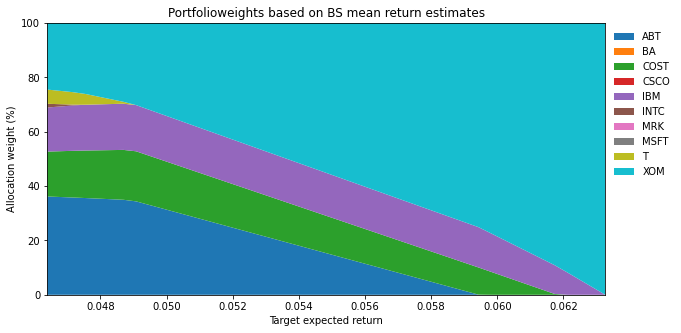

In [36]:
fig5 = plt.figure(num=2, facecolor='w', figsize=(10, 5))
plt.stackplot(V_Target_bs, V_Weight_bs.T*100)
plt.axis([min_bs, max_bs, 0.0, 100.0])
plt.legend(list(frame.columns),
           loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False)
plt.xlabel('Target expected return') 
plt.title('Portfolioweights based on BS mean return estimates')
plt.ylabel('Allocation weight (%)')
plt.show()

#### Ledoit-Wolf versus historisch geschätzte Varianz-Kovarianzmatrix

Berechnung der Gewichte des Minimum Varianz Portfolios auf Basis der Ledoit-Wolf Schätzung der Varianz-Kovarianzmatrix. 

In [37]:
bnd=[(0, 1),(0, 1),(0, 1),(0, 1),(0, 1),
     (0, 1),(0, 1),(0, 1),(0, 1),(0, 1)] # only positive weights
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x)-1.0})

res2= minimize(calculate_portfolio_var, Weight_1N, args=lw_Sigma, 
               bounds = bnd, method='SLSQP',constraints=cons,tol=1e-10, 
               options={'disp': True})
Weight_MV2_lw = res2.x

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.014806352991309255
            Iterations: 22
            Function evaluations: 242
            Gradient evaluations: 22


Ermittlung des Intervalls der Zielrenditen (unter Verwendung der historischen Mittelwerte als Schätzer für $\mu$). 

In [38]:
# calculation of min and max target return
# min: expected return of MVP, max: expected return of MRP

min_lw = calculate_portfolio_ret(Weight_MV2_lw, means)
max_lw = calculate_portfolio_ret(Weight_MRP, means) # no change here!

Berechnung der Effizienzkurve. 

In [39]:
V_Target_lw = np.linspace(min_lw, max_lw, num=45)
V_Risk_lw = np.zeros(V_Target.shape)
V_Return_lw = np.zeros(V_Target.shape)
V_Weight_lw = np.zeros((V_Target.shape[0], means.shape[0]))
for idx, Target_Return in enumerate(V_Target_lw):
    cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x)-1.0},
            {'type': 'eq', 'fun': lambda x:  calculate_portfolio_ret(x,means)-Target_Return})
    res= minimize(calculate_portfolio_var, Weight_1N, args=lw_Sigma, 
               bounds = bnd, method='SLSQP',constraints=cons,tol=1e-10)
    V_Weight_lw[idx, :] = res.x.T
    V_Return_lw[idx] = calculate_portfolio_ret(res.x,means)
    V_Risk_lw[idx] = np.sqrt(calculate_portfolio_var(res.x, lw_Sigma))

Graphische Darstellung der Effizienzkurve auf Basis der Ledoit-Wolf Varianz-Kovarianzmatrix und der historisch geschätzten.

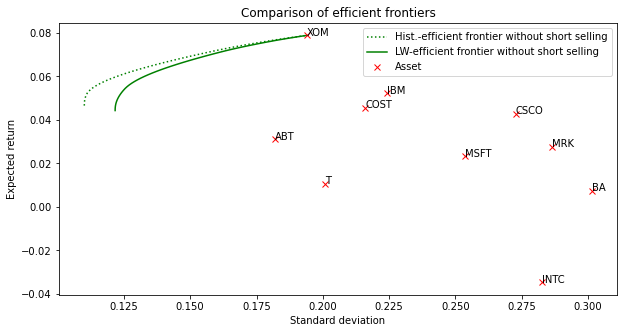

In [40]:
fig6 = plt.figure(num=1, facecolor='w', figsize=(10, 5))
ax = fig6.add_subplot(111)
plt.plot(V_Risk, V_Target, 'g:', label='Hist.-efficient frontier without short selling')
plt.plot(V_Risk_lw, V_Target_lw, 'g-', label='LW-efficient frontier without short selling')
plt.plot(np.sqrt(np.diagonal(Sigma)), means, 'rx', label='Asset')
for i, txt in enumerate(frame.columns):
   ax.annotate(txt, (np.sqrt(np.diagonal(Sigma))[i],means[i]))
plt.legend(loc='best',  frameon=True)
plt.xlabel('Standard deviation')
plt.ylabel('Expected return')
plt.title('Comparison of efficient frontiers')
plt.show()

Portfoliogewichte auf Grundlage des Ledoit-Wolf Schätzers der erwarteten Varianz-Kovarianzmatrix:

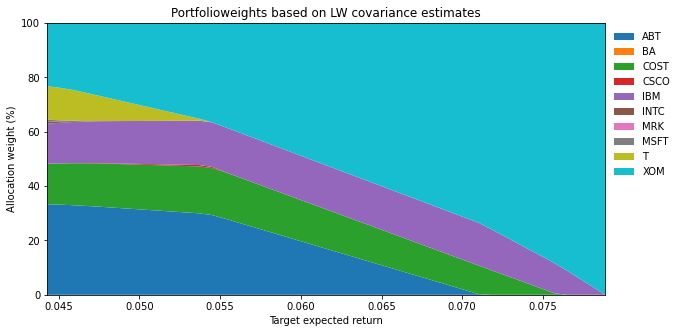

In [41]:
fig7 = plt.figure(num=2, facecolor='w', figsize=(10, 5))
plt.stackplot(V_Target_lw, V_Weight_lw.T*100)
plt.axis([min_lw, max_lw, 0.0, 100.0])
plt.legend(list(frame.columns),
           loc='upper left', bbox_to_anchor=(1.0, 1.0), frameon=False)
plt.xlabel('Target expected return') 
plt.title('Portfolioweights based on LW covariance estimates')
plt.ylabel('Allocation weight (%)')
plt.show()

## Literatur

Franzen, D., Schäfer, K. (2018). Assetmanagement. Schäffer-Poeschel, Stuttgart.

James, W., Stein, C. (1961). Estimation with quadratic loss. In Proceedings of the fourth Berkeley symposium on mathematical statistics and probability. 

Jorion, P. (1985). International portfolio diversification with estimation risk. Journal of Business 58, S. 259-278. 

Jorion, P. (1986). Bayes-Stein estimation for portfolio analysis. Journal of Financial and Quantitative Analysis 21, S. 279-292.

Ledoit, O., Wolf, M. (2003). Improved estimation of the covariance matrix
of stock returns with an application to portfolio selection. Journal of Empirical Finance 10, S. 603-621. 

Sharpe, W. (1963). A simplified model for portfolio analysis. Management Science 9, S. 277-293.

Zellner, A., Chetty, V. K. (1965). Prediction and decision problems in regression models from the Bayesian point of view. Journal of the American Statistical Association 60, S. 608-616. 
